In [ ]:
import os
import pandas as pd

# Define the folder containing the dataset
folder_path = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\01-12"

# Define TLS-related ports and Protocol (TCP = 6)
tls_ports = [443, 993, 995, 8443]
protocol_value = 6  # TCP

# Define chunk size for large files
chunk_size = 100000  # 100k rows per chunk
large_file_threshold = 1.5 * (1024 ** 3)  # 1.5GB in bytes

# List to store TLS traffic DataFrames
tls_attacks_list = []

# Iterate through all files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if it's a CSV file
    if file_name.endswith(".csv"):
        file_size = os.path.getsize(file_path)

        print(f"Processing: {file_name} | Size: {round(file_size / (1024 ** 3), 2)} GB")
        
        if file_size > large_file_threshold:
            # Process large files in chunks
            print(f" {file_name} is large. Processing in chunks...")
            for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
                tls_chunk = chunk[(chunk[' Destination Port'].isin(tls_ports))]
                if not tls_chunk.empty:
                    tls_attacks_list.append(tls_chunk)
        else:
            # Process small files normally
            df = pd.read_csv(file_path, low_memory=False)
            tls_attacks = df[(df[' Destination Port'].isin(tls_ports))]
            if not tls_attacks.empty:
                tls_attacks_list.append(tls_attacks)


combined_tls_attacks = pd.concat(tls_attacks_list, ignore_index=True)

# Save the final dataset
output_path = os.path.join("E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\TLS_Traffic_Dataset\\TLS_Combined_Attacks_01_12.csv")
combined_tls_attacks.to_csv(output_path, index=False)

print(f"\n Final TLS attack dataset saved at: {output_path}")
print("TLS Attack Class Distribution:\n", combined_tls_attacks[' Label'].value_counts())

Processing: DrDoS_DNS.csv | Size: 1.99 GB
 DrDoS_DNS.csv is large. Processing in chunks...
Processing: DrDoS_LDAP.csv | Size: 0.85 GB
Processing: DrDoS_MSSQL.csv | Size: 1.76 GB
 DrDoS_MSSQL.csv is large. Processing in chunks...
Processing: DrDoS_NetBIOS.csv | Size: 1.58 GB
 DrDoS_NetBIOS.csv is large. Processing in chunks...
Processing: DrDoS_NTP.csv | Size: 0.6 GB
Processing: DrDoS_SNMP.csv | Size: 2.02 GB
 DrDoS_SNMP.csv is large. Processing in chunks...
Processing: DrDoS_SSDP.csv | Size: 1.17 GB
Processing: DrDoS_UDP.csv | Size: 1.4 GB
Processing: Syn.csv | Size: 0.59 GB
Processing: TFTP.csv | Size: 8.66 GB
 TFTP.csv is large. Processing in chunks...
Processing: UDPLag.csv | Size: 0.15 GB

 Final TLS attack dataset saved at: E:\Studies\IIT\4 - Forth Year\Final Year Project\Datasets\CIC-DDoS2019\TLS_Traffic_Dataset\TLS_Combined_Attacks_01_12.csv
TLS Attack Class Distribution:
 BENIGN           15225
TFTP              1163
DrDoS_SNMP         337
DrDoS_DNS          326
DrDoS_MSSQL    

In [ ]:
import os
import pandas as pd

# Define the new folder containing CICDDoS2019 dataset
folder_path = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\03-11"

# Define TLS-related ports and Protocol (TCP = 6)
tls_ports = [443, 993, 995, 8443]

# Define chunk size for large files
chunk_size = 100000  # 100k rows per chunk
large_file_threshold = 1.5 * (1024 ** 3)  # 1.5GB in bytes

# List to store TLS traffic DataFrames
tls_attacks_list = []

# Iterate through all files in the folder
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Check if it's a CSV file
    if file_name.endswith(".csv"):
        file_size = os.path.getsize(file_path)

        print(f"Processing: {file_name} | Size: {round(file_size / (1024 ** 3), 2)} GB")
        
        if file_size > large_file_threshold:
            # Process large files in chunks
            print(f" {file_name} is large. Processing in chunks...")
            for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
                tls_chunk = chunk[(chunk[' Destination Port'].isin(tls_ports))]
                if not tls_chunk.empty:
                    tls_attacks_list.append(tls_chunk)
        else:
            # Process small files normally
            df = pd.read_csv(file_path, low_memory=False)
            tls_attacks = df[(df[' Destination Port'].isin(tls_ports))]
            if not tls_attacks.empty:
                tls_attacks_list.append(tls_attacks)

combined_tls_attacks = pd.concat(tls_attacks_list, ignore_index=True)

# Save the final dataset
output_path = os.path.join("E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\TLS_Traffic_Dataset\\TLS_Combined_Attacks_03_11.csv")
combined_tls_attacks.to_csv(output_path, index=False)

print(f"\n Final TLS attack dataset saved at: {output_path}")
print("TLS Attack Class Distribution:\n", combined_tls_attacks[' Label'].value_counts())

Processing: LDAP.csv | Size: 0.81 GB
Processing: MSSQL.csv | Size: 2.22 GB
 MSSQL.csv is large. Processing in chunks...
Processing: NetBIOS.csv | Size: 1.32 GB
Processing: Portmap.csv | Size: 0.07 GB
Processing: Syn.csv | Size: 1.75 GB
 Syn.csv is large. Processing in chunks...
Processing: UDP.csv | Size: 1.67 GB
 UDP.csv is large. Processing in chunks...
Processing: UDPLag.csv | Size: 0.3 GB

 Final TLS attack dataset saved at: E:\Studies\IIT\4 - Forth Year\Final Year Project\Datasets\CIC-DDoS2019\TLS_Traffic_Dataset\TLS_Combined_Attacks_03_11.csv
TLS Attack Class Distribution:
 BENIGN     21500
MSSQL        355
Syn          335
NetBIOS      245
LDAP         119
UDP           59
Portmap       20
Name:  Label, dtype: int64


Merged dataset saved successfully at: E:\Studies\IIT\4 - Forth Year\Final Year Project\Datasets\CIC-DDoS2019\TLS_Traffic_Dataset\TLS_Merged_Attacks_Final.csv
Final dataset shape: (40606, 88)


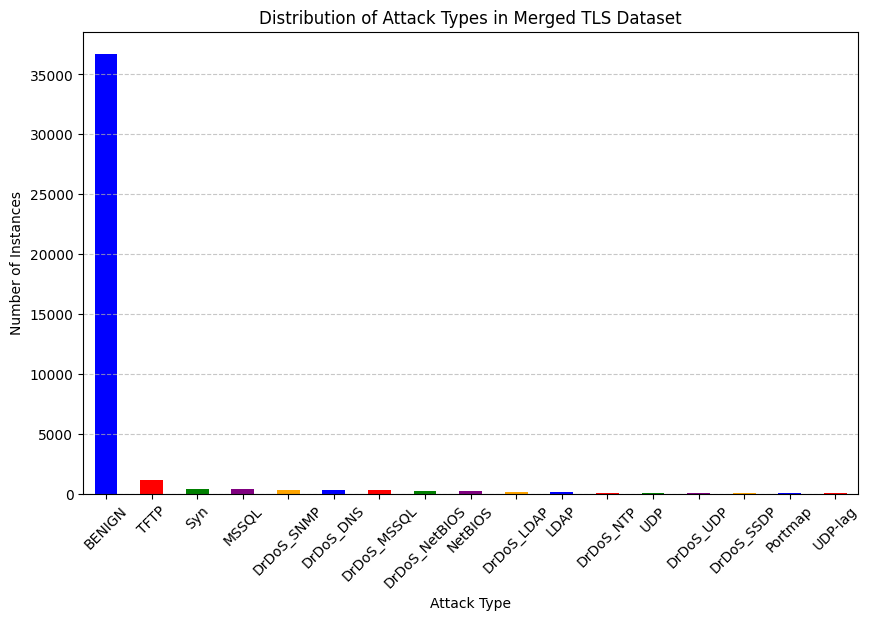

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load both datasets
file_path_01_12 = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\TLS_Traffic_Dataset\\TLS_Combined_Attacks_01_12.csv"
file_path_03_11 = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\TLS_Traffic_Dataset\\TLS_Combined_Attacks_03_11.csv"

df_01_12 = pd.read_csv(file_path_01_12, low_memory=False)
df_03_11 = pd.read_csv(file_path_03_11, low_memory=False)

# Merge the datasets
merged_df = pd.concat([df_01_12, df_03_11], ignore_index=True)

# Save the merged dataset
output_path = "E:\\Studies\\IIT\\4 - Forth Year\\Final Year Project\\Datasets\\CIC-DDoS2019\\TLS_Traffic_Dataset\\TLS_Merged_Attacks_Final.csv"
merged_df.to_csv(output_path, index=False)

print(f"Merged dataset saved successfully at: {output_path}")
print("Final dataset shape:", merged_df.shape)

# Plot Attack Type Distribution
plt.figure(figsize=(10, 6))
merged_df[' Label'].value_counts().plot(kind='bar', color=['blue', 'red', 'green', 'purple', 'orange'])
plt.xlabel("Attack Type")
plt.ylabel("Number of Instances")
plt.title("Distribution of Attack Types in Merged TLS Dataset")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()